### Imports

In [36]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Estimate Expected Return of stocks from CAPM

In [2]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA','AMD', 'QCOM', '^SPX']
data = yf.download(tickers, start= '2013-01-01')['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [3]:
data

Ticker,AAPL,AMD,AMZN,GOOGL,META,MSFT,NVDA,QCOM,TSLA,^SPX
Date,,,,,,,,,,
2013-01-02,16.687349,2.530000,12.865500,18.033974,27.893450,22.406958,0.293515,46.503189,2.357333,1462.420044
2013-01-03,16.476715,2.490000,12.924000,18.044447,27.664324,22.106796,0.293745,46.287724,2.318000,1459.369995
2013-01-04,16.017757,2.590000,12.957500,18.401012,28.650557,21.693050,0.303437,45.605450,2.293333,1466.469971
2013-01-07,15.923534,2.670000,13.423000,18.320721,29.308044,21.652489,0.294668,45.971722,2.289333,1461.890015
2013-01-08,15.966396,2.670000,13.319000,18.284567,28.949413,21.538918,0.288207,45.899914,2.245333,1457.150024
...,...,...,...,...,...,...,...,...,...,...
2025-01-27,229.860001,115.010002,235.419998,191.809998,659.880005,434.559998,118.419998,171.179993,397.149994,6012.279785
2025-01-28,238.259995,114.169998,238.149994,195.300003,674.330017,447.200012,128.990005,171.550003,398.089996,6067.700195
2025-01-29,239.360001,117.349998,237.070007,195.410004,676.489990,442.329987,123.699997,171.710007,389.100006,6039.310059


In [4]:
# calculate the daily logarithmic return
log_return = np.log(data/data.shift(1))
log_return.dropna(inplace=True)
log_return

Ticker,AAPL,AMD,AMZN,GOOGL,META,MSFT,NVDA,QCOM,TSLA,^SPX
Date,,,,,,,,,,
2013-01-03,-0.012703,-0.015937,0.004537,0.000581,-0.008248,-0.013486,0.000786,-0.004644,-0.016826,-0.002088
2013-01-04,-0.028250,0.039375,0.002589,0.019568,0.035029,-0.018893,0.032460,-0.014850,-0.010699,0.004853
2013-01-07,-0.005900,0.030421,0.035295,-0.004373,0.022689,-0.001872,-0.029324,0.007999,-0.001746,-0.003128
2013-01-08,0.002688,0.000000,-0.007778,-0.001975,-0.012312,-0.005259,-0.022170,-0.001563,-0.019407,-0.003248
2013-01-09,-0.015753,-0.015095,-0.000113,0.006552,0.051311,0.005634,-0.022673,0.015063,-0.001188,0.002652
...,...,...,...,...,...,...,...,...,...,...
2025-01-27,0.031286,-0.065864,0.002424,-0.042862,0.018955,-0.021626,-0.185946,-0.005418,-0.023467,-0.014688
2025-01-28,0.035892,-0.007331,0.011530,0.018032,0.021662,0.028672,0.085497,0.002159,0.002364,0.009176
2025-01-29,0.004606,0.027472,-0.004545,0.000563,0.003198,-0.010950,-0.041876,0.000932,-0.022842,-0.004690


In [5]:
# calculate the annualized average return
annualized_return = log_return.mean() * 252
array_returns = annualized_return.to_numpy()
# calculate the annualized standard deviation
annualized_std = log_return.std(ddof=0) * np.sqrt(252)
array_std = annualized_std.to_numpy()   

In [43]:
def plot_points(array_returns, array_std, tickers):
    fig = go.Figure()
    for i in range(len(array_returns)):
        fig.add_trace(go.Scatter(x=[array_std[i]], y=[array_returns[i]], mode='markers', name=annualized_return.index[i]))
        fig.add_annotation(x=array_std[i], y=array_returns[i], text=annualized_return.index[i], showarrow=False, yshift=10)
    fig.update_layout(title='Risk and Return', xaxis_title='Risk', yaxis_title='Return')
    fig.update_layout(showlegend=True)
    
def plot_points2(array_returns, array_std, tickers):
    plt.figure(figsize=(12,8))
    plt.scatter(array_std, array_returns, marker='o', color='black')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Mean')
    for i in range(len(array_returns)):
        plt.annotate(tickers[i], (array_std[i], array_returns[i]), ha = 'center', va = 'bottom', weight = 'bold')

In [7]:
plot_points(array_returns, array_std, tickers)

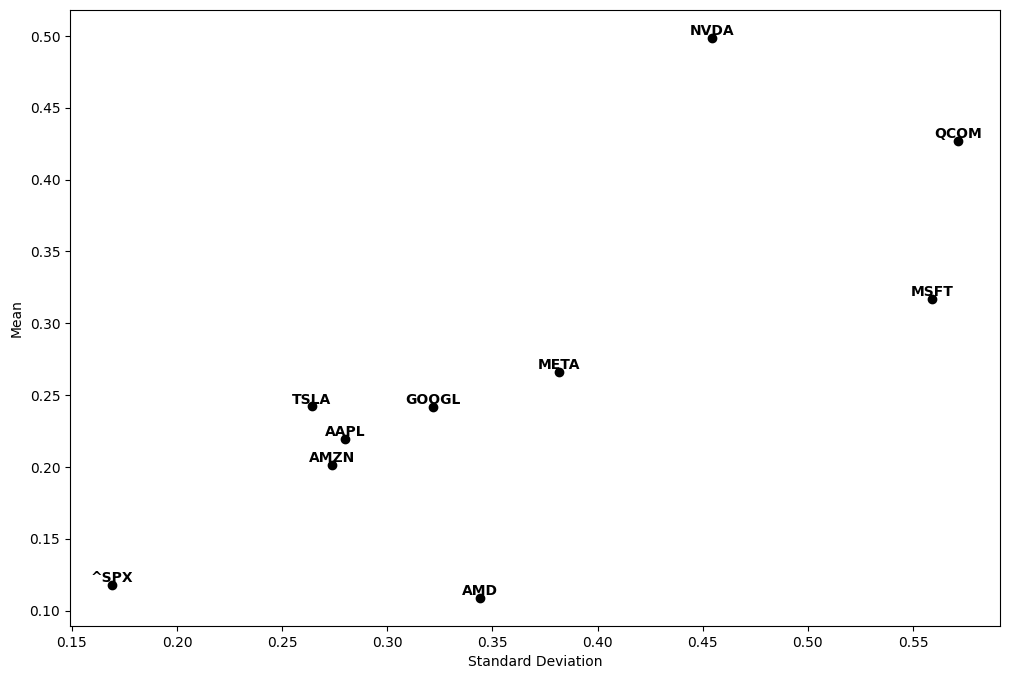

In [ ]:
plot_points2(array_returns, array_std, tickers)

In [8]:
# Portfolio expected return
equal_weights = np.array([1/len(tickers)]*len(tickers))
mu_p = equal_weights @ array_returns
print('Portfolio expected return:', mu_p)

Portfolio expected return: 0.26397107860442787


In [9]:
# Correlation matrix
corr_matrix = log_return.corr()
# is matrix semi-positive definite?
np.all(np.linalg.eigvals(corr_matrix) > 0)
corr_matrix

Ticker,AAPL,AMD,AMZN,GOOGL,META,MSFT,NVDA,QCOM,TSLA,^SPX
Ticker,,,,,,,,,,
AAPL,1.000000,0.385349,0.489687,0.549792,0.464628,0.612038,0.501892,0.500284,0.374449,0.697357
AMD,0.385349,1.000000,0.383608,0.364034,0.331654,0.414730,0.568503,0.425665,0.312725,0.490358
AMZN,0.489687,0.383608,1.000000,0.621593,0.551279,0.597521,0.491929,0.401078,0.371813,0.612583
GOOGL,0.549792,0.364034,0.621593,1.000000,0.583737,0.669373,0.522880,0.460140,0.355444,0.709435
META,0.464628,0.331654,0.551279,0.583737,1.000000,0.515179,0.448101,0.366679,0.308560,0.567151
MSFT,0.612038,0.414730,0.597521,0.669373,0.515179,1.000000,0.578002,0.501877,0.368556,0.763280
NVDA,0.501892,0.568503,0.491929,0.522880,0.448101,0.578002,1.000000,0.540690,0.376803,0.633967
QCOM,0.500284,0.425665,0.401078,0.460140,0.366679,0.501877,0.540690,1.000000,0.325997,0.623048
TSLA,0.374449,0.312725,0.371813,0.355444,0.308560,0.368556,0.376803,0.325997,1.000000,0.448156


In [14]:
# Covariance matrix
cov_matrix = log_return.cov(ddof=0)*252
cov_matrix


Ticker,AAPL,AMD,AMZN,GOOGL,META,MSFT,NVDA,QCOM,TSLA,^SPX
Ticker,,,,,,,,,,
AAPL,0.078363,0.060322,0.044097,0.042095,0.049612,0.045242,0.063832,0.048178,0.059883,0.033037
AMD,0.060322,0.312697,0.069006,0.055678,0.070741,0.061240,0.144432,0.081886,0.099903,0.046405
AMZN,0.044097,0.069006,0.103484,0.054692,0.067644,0.050757,0.071896,0.044386,0.068331,0.033350
GOOGL,0.042095,0.055678,0.054692,0.074809,0.060900,0.048345,0.064976,0.043296,0.055540,0.032838
META,0.049612,0.070741,0.067644,0.060900,0.145495,0.051891,0.077655,0.048116,0.067238,0.036611
MSFT,0.045242,0.061240,0.050757,0.048345,0.051891,0.069729,0.069343,0.045591,0.055599,0.034110
NVDA,0.063832,0.144432,0.071896,0.064976,0.077655,0.069343,0.206414,0.084507,0.097800,0.048744
QCOM,0.048178,0.081886,0.044386,0.043296,0.048116,0.045591,0.084507,0.118346,0.064069,0.036273
TSLA,0.059883,0.099903,0.068331,0.055540,0.067238,0.055599,0.097800,0.064069,0.326369,0.043328


In [19]:
# Portfolio expected risk
sigma_p = np.sqrt(equal_weights @ cov_matrix @ equal_weights.T)
print('Portfolio expected risk:', sigma_p)

Portfolio expected risk: 0.25944500599336917


In [20]:
def random_weights(n):
    weights = np.random.randn(n)
    return weights/sum(weights)

In [33]:
def mu_sigma_portfolio(weights, returns, cov_matrix):
    mu_p = weights @ returns
    sigma_p = np.sqrt(weights @ cov_matrix @ weights.T)
    return mu_p, sigma_p

In [34]:
def plot_random_portfolios(mu, cov, n_simulation):
    fig = go.Figure()
    for i in range(n_simulation):
        weights = random_weights(len(mu))
        mu_p, sigma_p = mu_sigma_portfolio(weights, mu, cov)
        fig.add_trace(go.Scatter(x=[sigma_p], y=[mu_p], mode='markers', marker=dict(color='blue', size=5)))
    fig.update_layout(title='Risk and Return', xaxis_title='Risk', yaxis_title='Return')
    fig.show()

In [35]:
fig = go.Figure()
plot_points(array_returns, array_std, tickers)
plot_random_portfolios(array_returns, cov_matrix, 100)
fig.show()